In [1]:
import json
import pandas as pd

with open('../data/training/multilingual/training.en-en.data') as f:
    train_en_en_X = json.load(f)
    
with open('../data/training/multilingual/training.en-en.gold') as f:
    train_en_en_y = json.load(f)
    
df = pd.DataFrame(train_en_en_X)
df = df.merge(pd.DataFrame(train_en_en_y))

In [2]:
df.head()

,id,lemma,pos,sentence1,sentence2,start1,end1,start2,end2,tag
0,training.en-en.0,play,NOUN,In that context of coordination and integratio...,A musical play on the same subject was also st...,69,73,10,14,F
1,training.en-en.1,play,NOUN,In that context of coordination and integratio...,"In schools, when water is needed, it is girls ...",69,73,112,116,F
2,training.en-en.2,esteem,NOUN,We would also like to convey our esteem and co...,"Father Lini said that, because of that, the Un...",33,39,106,112,T
3,training.en-en.3,esteem,NOUN,We would also like to convey our esteem and co...,This attests to the esteem and trust enjoyed b...,33,39,20,26,T
4,training.en-en.4,holder,NOUN,This growth is the direct result of the increa...,A person may be either the holder of an option...,74,81,27,33,T


In [3]:
df.shape

(8000, 10)

In [4]:
df.describe()

,id,lemma,pos,sentence1,sentence2,start1,end1,start2,end2,tag
count,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000
unique,8000,3726,4,3994,7991,227,233,244,248,2
top,training.en-en.5076,round,NOUN,Intervention of independent personalities incl...,The escalating production and acquisition of a...,4,34,4,50,T
freq,1,6,4124,4,2,220,100,177,89,4000


### Посмотрим на распределение слов по частям речи

<AxesSubplot:>

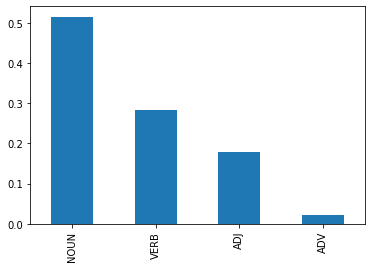

In [5]:
df['pos'].value_counts(normalize=True).plot(kind='bar')

### Каждое слово встречается в 2, 4 или 6 парах предложений

In [6]:
df['lemma'].value_counts().value_counts()

2    3459
4     260
6       7
Name: lemma, dtype: int64

### Тэги True и False втречаются одинаково часто

In [7]:
df['tag'].value_counts()

T    4000
F    4000
Name: tag, dtype: int64

### Посмотрим, как часто слова употребляются в одинаковых значениях и как часто в разных, а также в каком соотношении

<AxesSubplot:xlabel='true_tag_count,false_tag_count'>

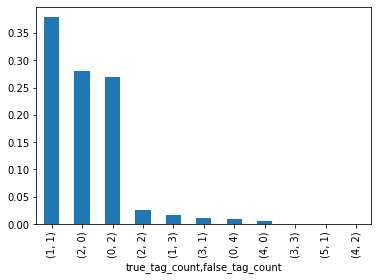

In [8]:
lemma_tag_stats_df = pd.DataFrame(columns=['lemma', 'true_tag_count', 'false_tag_count'])

for lemma, tag_df in df[['lemma', 'tag']].value_counts().reset_index(name='tag_count').groupby('lemma'):
    tag_stats = {
        'lemma': lemma,
        'true_tag_count': 0,
        'false_tag_count': 0
    }
    
    for _, (_, tag, tag_count) in tag_df.iterrows():
        if tag == 'T':
            tag_stats['true_tag_count'] = tag_count
        elif tag == 'F':
            tag_stats['false_tag_count'] = tag_count
        else:
            raise RuntimeError('Unknown tag: {}'.format(tag))

    lemma_tag_stats_df = lemma_tag_stats_df.append(tag_stats, ignore_index=True)
    
lemma_tag_stats_df[['true_tag_count', 'false_tag_count']].value_counts(normalize=True
).plot(kind='bar')

### Посмотрим, в каких частях речи встречаются слова, и в каком соотношении

<AxesSubplot:xlabel='noun_count,verb_count,adj_count,adv_count'>

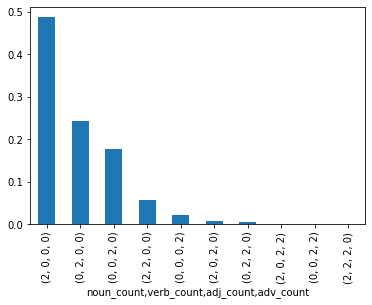

In [9]:
lemma_pos_stats_df = pd.DataFrame(columns=['lemma', 'noun_count', 'verb_count', 'adj_count', 'adv_count'])

for lemma, pos_df in df[['lemma', 'pos']].value_counts().reset_index(name='pos_count').groupby('lemma'):
    pos_stats = {
        'lemma': lemma,
        'noun_count': 0,
        'verb_count': 0,
        'adj_count': 0,
        'adv_count': 0
    }
    
    for _, (_, pos, pos_count) in pos_df.iterrows():
        if pos == 'NOUN':
            pos_stats['noun_count'] = pos_count
        elif pos == 'VERB':
            pos_stats['verb_count'] = pos_count
        elif pos == 'ADJ':
            pos_stats['adj_count'] = pos_count
        elif pos == 'ADV':
            pos_stats['adv_count'] = pos_count
        else:
            raise RuntimeError('Unknown pos: {}'.format(pos))

    lemma_pos_stats_df = lemma_pos_stats_df.append(pos_stats, ignore_index=True)

lemma_pos_stats_df[['noun_count', 'verb_count', 'adj_count', 'adv_count']].value_counts(normalize=True
).plot(kind='bar')